# DATA ANALYSIS OF HABERMAN'S SURVIVAL DATASET

#### Description of dataset

The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer

#### Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

#### Small description of lymp nodes:

Lymph Node: Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)

https://www.cancer.org/cancer/cancer-basics/lymph-nodes-and-cancer.html

In [1]:
#importing necessary ploting libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df=pd.read_csv("haberman.csv")

In [3]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Mapping the values of the status AS :- {1:"yes" , 2:"No"}

In [4]:
df["status"]=df["status"].map({1:"yes",2:"No"})

In [5]:
df["status"].unique()

array(['yes', 'No'], dtype=object)

In [6]:
df["nodes"].unique()

array([ 1,  3,  0,  2,  4, 10,  9, 30,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28],
      dtype=int64)

In [7]:
df["year"].unique()

array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68], dtype=int64)

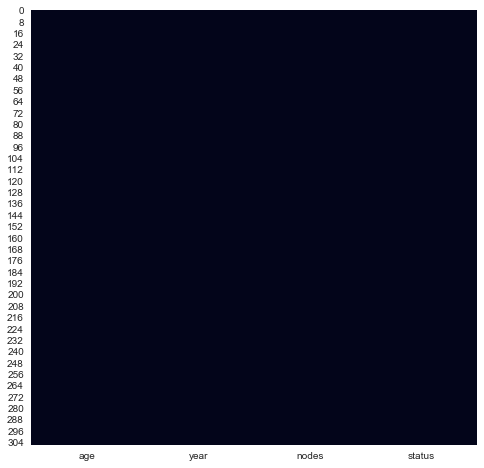

In [8]:
#checking whether there is any null or missing values in dataset 
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),cbar=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     306 non-null    int64 
 1   year    306 non-null    int64 
 2   nodes   306 non-null    int64 
 3   status  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [10]:
df.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


1. In the above five point statistic it can be seen that for the age column, the average age of a patient at the time of operation is 52 years.

### Some normal insight from data

number of patient who survived 5 years or Longer = 225
number of patient who unfortunately did not survived = 81


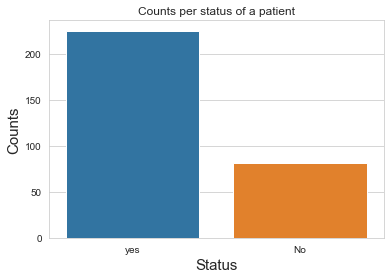

In [11]:
# checking the number of counts in the status column
sns.countplot(df["status"])
plt.title("Counts per status of a patient")
plt.xlabel("Status",fontsize=15)
plt.ylabel("Counts",fontsize=15)
print("number of patient who survived 5 years or Longer =",df["status"][df["status"]=="yes"].count())
print("number of patient who unfortunately did not survived =",df["status"][df["status"]=="No"].count())

It can be seen from the above graph observation that about 73% of the patient survived for 5 years or longer and about 27% did not survived.

In [12]:
df1=pd.crosstab(df["year"],df["status"],margins=True)

In [13]:
df1

status,No,yes,All
year,,,
58,12,24,36
59,9,18,27
60,4,24,28
61,3,23,26
62,7,16,23
63,8,22,30
64,8,23,31
65,13,15,28
66,6,22,28


In [14]:
y=[]
n=[]
t=0
for i,j in zip(df1["yes"],df1["No"]):
    t=i+j
    y.append("{:.2f}%".format((i/t)*100))
    n.append("{:.2f}%".format((j/t)*100))
print(y[:-1])
print(n[:-1])

['66.67%', '66.67%', '85.71%', '88.46%', '69.57%', '73.33%', '74.19%', '53.57%', '78.57%', '84.00%', '76.92%', '63.64%']
['33.33%', '33.33%', '14.29%', '11.54%', '30.43%', '26.67%', '25.81%', '46.43%', '21.43%', '16.00%', '23.08%', '36.36%']


In [15]:
df2=pd.concat([pd.DataFrame((sorted(df['year'].unique())),columns=["year"]),pd.DataFrame(pd.Series(y[:-1]),columns=["yes_%"]),pd.DataFrame(pd.Series(n[:-1]),columns=["no_%"])],axis=1)

In [16]:
df2

,year,yes_%,no_%
0,58,66.67%,33.33%
1,59,66.67%,33.33%
2,60,85.71%,14.29%
3,61,88.46%,11.54%
4,62,69.57%,30.43%
5,63,73.33%,26.67%
6,64,74.19%,25.81%
7,65,53.57%,46.43%
8,66,78.57%,21.43%
9,67,84.00%,16.00%


1. as can be seen from the above data produced, most people survived in the year '1967 and the maximum number of deaths where recorded in the year 1965

### looking at the univariate analysis of the data points based on the target varibale

Text(0.5, 1, 'Distribution of Age column based on Status')

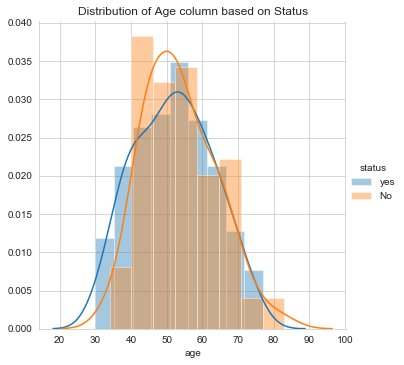

In [13]:
sns.FacetGrid(df,hue="status",height=5)\
.map(sns.distplot,"age")\
.add_legend();
plt.title("Distribution of Age column based on Status")

Text(0.5, 1, 'distribution of year column based on status')

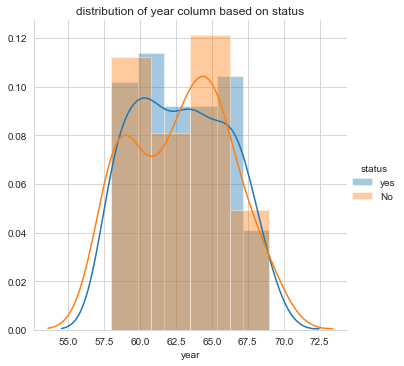

In [14]:
sns.FacetGrid(df,hue="status",height=5)\
.map(sns.distplot,"year")\
.add_legend();
plt.title("distribution of year column based on status")

Text(0.5, 1, 'Distribution of nodes column based on status')

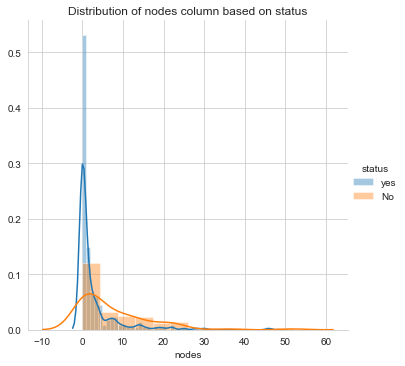

In [15]:
sns.FacetGrid(df,hue="status",height=5)\
.map(sns.distplot,"nodes")\
.add_legend();
plt.title("Distribution of nodes column based on status")

It is quite visible from the above distribution plots of independent variables based on the status(whether patient survived for 5 years or did not survived) that it is very difficult to make predictions by using simple if-else model as the data is hugely overlaping.

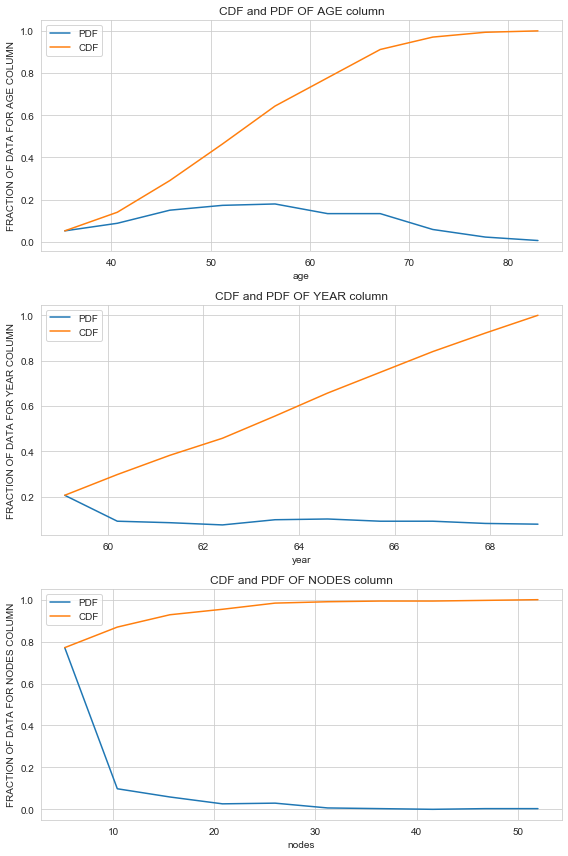

In [34]:
#ploting the pdf and CDF of the attributes
plt.figure(figsize=(8,12))
plotnumber=1
for i in list(df.columns)[:-1]:
    if plotnumber<4:
        plt.subplot(3,1,plotnumber)
        counts,bin_edges=np.histogram(df[i],bins=10,density=True)
        pdf = counts/sum(counts)
        cdf= np.cumsum(pdf)
        label=["PDF","CDF"]
        plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf,label=label)
        plt.xlabel(i)
        plt.ylabel("FRACTION OF DATA FOR {} COLUMN".format(i.upper()))
        plt.title("CDF and PDF OF {} column".format(i.upper()))
        plt.legend(label)
        plotnumber+=1
plt.tight_layout()

#### ploting the pdf and cdf based on the status

Text(0.5, 1.0, 'PDF AND CDF OF AGE BASED ON STATUS')

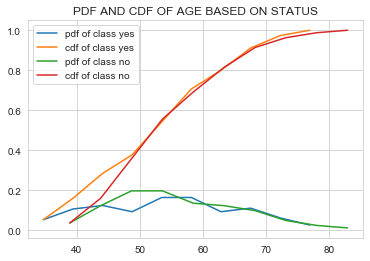

In [21]:
#For age
one = df.loc[df["status"] == "yes"]
two = df.loc[df["status"] == "No"]
label = ["pdf of class yes", "cdf of class yes", "pdf of class no", "cdf of class no"]
counts, bin_edges = np.histogram(one["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.title("PDF AND CDF OF AGE BASED ON STATUS")

Text(0.5, 1.0, 'PDF AND CDF OF YEAR BASED ON STATUS')

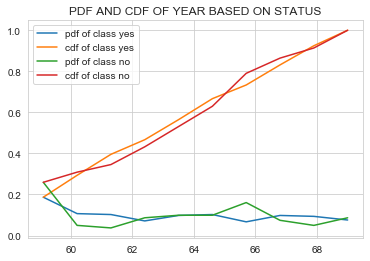

In [22]:
#For year
one = df.loc[df["status"] == "yes"]
two = df.loc[df["status"] == "No"]
label = ["pdf of class yes", "cdf of class yes", "pdf of class no", "cdf of class no"]
counts, bin_edges = np.histogram(one["year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.title("PDF AND CDF OF YEAR BASED ON STATUS")

Text(0.5, 1.0, 'PDF AND CDF OF NODES BASED ON STATUS')

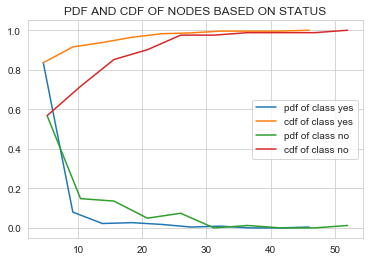

In [23]:
#For nodes
one = df.loc[df["status"] == "yes"]
two = df.loc[df["status"] == "No"]
label = ["pdf of class yes", "cdf of class yes", "pdf of class no", "cdf of class no"]
counts, bin_edges = np.histogram(one["nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.title("PDF AND CDF OF NODES BASED ON STATUS")

From above plots of pdf and cdf there is no clear cut information suporting which independent varible to choose for prediction

Text(0.5, 1.0, 'box plot of age with status')

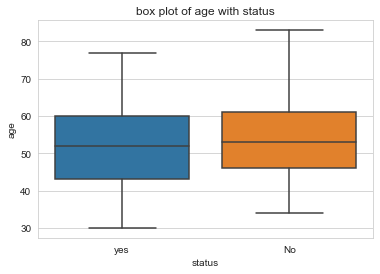

In [25]:
#box plot
sns.boxplot(y=df["age"],x=df["status"])
plt.title("box plot of age with status")

Text(0.5, 1.0, 'box plot of year with status')

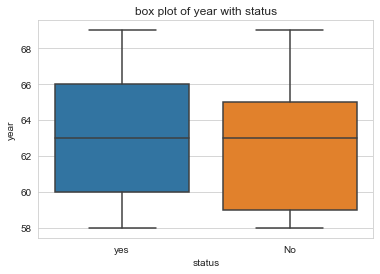

In [26]:
sns.boxplot(y=df["year"],x=df["status"])
plt.title("box plot of year with status")

Text(0.5, 1.0, 'box plot of nodes with status')

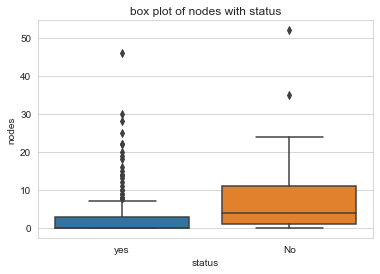

In [27]:
sns.boxplot(y=df["nodes"],x=df["status"])
plt.title("box plot of nodes with status")

1. From above box plot it can be seen that patients who have been detected with more than 47 positive axillary nodes , there is 100% chance of not surving.
2. still this is not at all enough evidence to use only nodes for predicting the output.

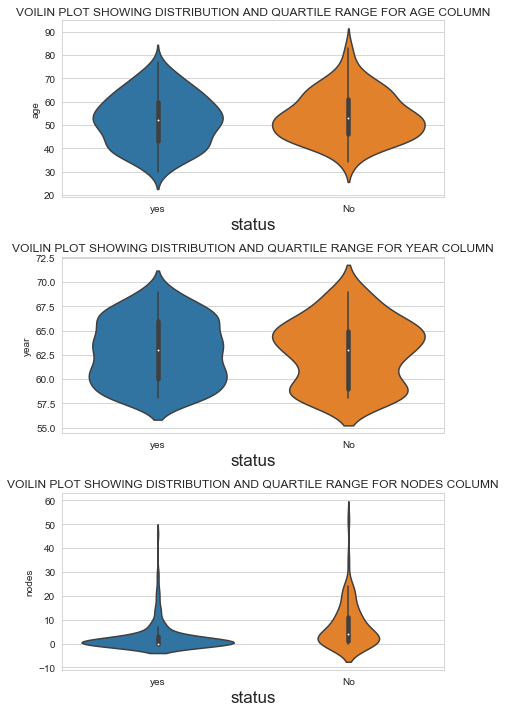

In [25]:
plt.figure(figsize=(7,10))
for idx,j in enumerate(list(df.columns)[:-1]):
    ax=plt.subplot(3,1,idx+1)
    sns.violinplot(x=df["status"],y=df[j],axes=ax)
    plt.xlabel("status",fontsize=17)
    plt.title("VOILIN PLOT SHOWING DISTRIBUTION AND QUARTILE RANGE FOR {} COLUMN".format(j.upper()))
    
plt.tight_layout()

1. most of the people who have survived for more than 5 years have 0(zero) number of positive axillary nodes detected (this can be seen from the voilin plot between nodes and status that most of the patients are lying in the 0 area) and there are vey less number of people who did not survived when they have been detected with positive axillary nodes.
2. there are high number of outliers in nodes column.
3. For both year and age columns distribution of people who survived and not survived is almost equal and no information can be obtained from the them.

### Bivariate Analysis

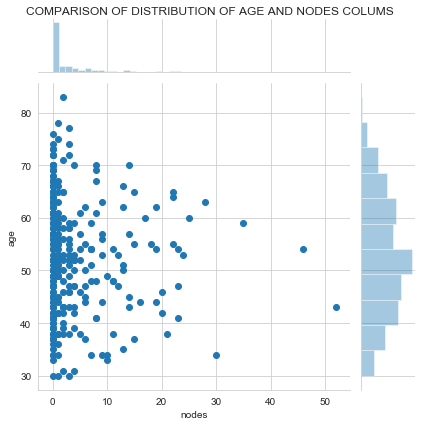

In [32]:
p=sns.jointplot(x=df["nodes"],y=df["age"],kind="scatter")
p.fig.suptitle("COMPARISON OF DISTRIBUTION OF AGE AND NODES COLUMS")
p.fig.subplots_adjust(top=0.95)

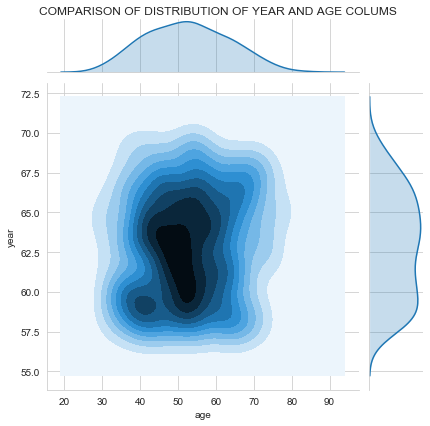

In [31]:
p=sns.jointplot(x=df["age"],y=df["year"],kind="kde")
p.fig.suptitle("COMPARISON OF DISTRIBUTION OF YEAR AND AGE COLUMS")
p.fig.subplots_adjust(top=0.95)

### mutlivariate analysis

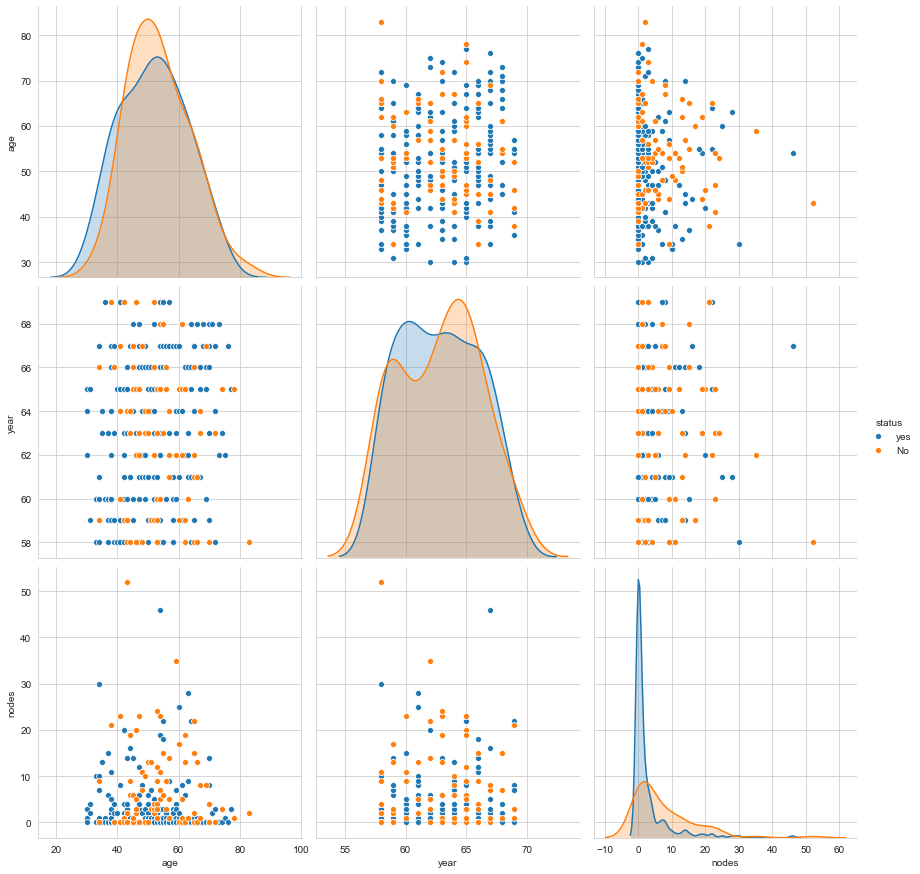

In [75]:
sns.pairplot(df,hue="status",height=4)

From both multivarite and bivarite analysis there is no clear evidence suporting any attribute to be for making a simple model as values are overlaping immensly.

# obervation

1. As from above analysis it is clear that the all the independent variables have a complex relation and making a simple model is not possible to predict the survival.
2. There may be few cases where nodes column(number of positive axillary nodes detected) can be used for predicting the status(i.e nodes>47), but still we cannot relie on this information as there are huge overlapping of data below nodes=47.
3. It is almost impossible to say anything about data just by visual representaion of it and therefore we have to apply a machine learning algorithm in order to decide which column to used for predicting the output. 